In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

In [33]:
df_heart = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Science_with_Python\heart.csv")

In [34]:
df_heart.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [35]:
print(df_heart.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [36]:
#shuffle
from sklearn.utils import shuffle
df_heart = shuffle(df_heart)

In [37]:
x = df_heart.iloc[:, : -1]
y = df_heart.iloc[:, -1]

In [38]:
#number of yes-no
counter = Counter(y)
print(counter)

Counter({1: 165, 0: 138})


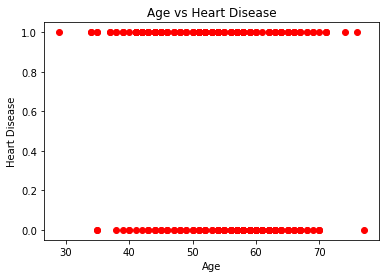

In [39]:
plt.figure()
plt.scatter(x['age'], y, color = 'red')
plt.title('Age vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.show()

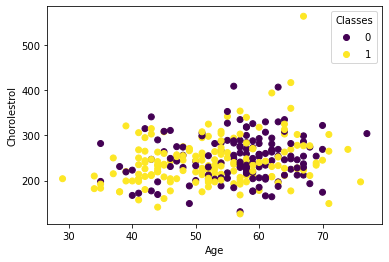

In [40]:
#cholestrol-age-label
plt.figure()
scatter = plt.scatter(x['age'], x['chol'], c = y)
plt.xlabel('Age')
plt.ylabel('Chorolestrol')
legend1 = plt.legend(*scatter.legend_elements(), title = "Classes")
plt.show()

In [41]:
x = df_heart[['age', 'chol']] 


In [42]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [43]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

In [44]:
#fit decision tree model to training set
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 3)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [45]:
#predict the results on test set
y_pred = dtc.predict(x_test)

In [46]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [47]:
print(cm)

[[24 21]
 [25 31]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


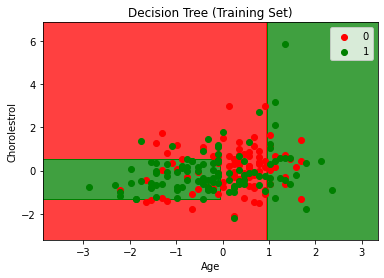

In [48]:
#Visualize train set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, dtc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                 alpha = 0.75, cmap  = ListedColormap(('red', 'green')))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Training Set)')
plt.xlabel('Age')
plt.ylabel('Chorolestrol')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


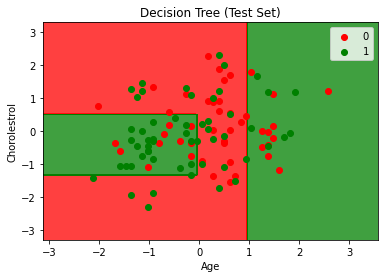

In [49]:
#Visualize test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, dtc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                 alpha = 0.75, cmap  = ListedColormap(('red', 'green')))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Test Set)')
plt.xlabel('Age')
plt.ylabel('Chorolestrol')
plt.legend()
plt.show()

In [50]:
df_heart = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Science_with_Python\heart.csv")

In [51]:
df_heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [52]:
print(df_heart.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [53]:
x = df_heart.iloc[:, : -1]
y = df_heart.iloc[:, -1]

In [54]:
#number of yes-no
counter = Counter(y)
print(counter)

Counter({1: 165, 0: 138})


In [55]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [56]:
#fit decision tree model to training set
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [57]:
#predict the results on test set
y_pred = dtc.predict(x_test)

In [58]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [59]:
print(cm)

[[35 14]
 [ 7 45]]
